In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

# **a) Linear SVM Classifier**

**i) Load MNIST dataset. After necessary data preparation, build a linear SVM classifier.**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# printing the shape of training and testing data
print(f"Training Images: {train_images.shape}")
print(f"Training Labels: {train_labels.shape}")
print(f"Testing Images: {test_images.shape}")
print(f"Testing Labels: {test_labels.shape}")

Training Images: (60000, 28, 28)
Training Labels: (60000,)
Testing Images: (10000, 28, 28)
Testing Labels: (10000,)


In [ ]:
# converting these ndarray into pandas dataframe
training_data = pd.DataFrame(train_images.reshape(60000, 784))
testing_data = pd.DataFrame(test_images.reshape(10000, 784))
training_data['label'] = train_labels
testing_data['label'] = test_labels
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
labels = list(np.sort(training_data['label'].unique()))
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


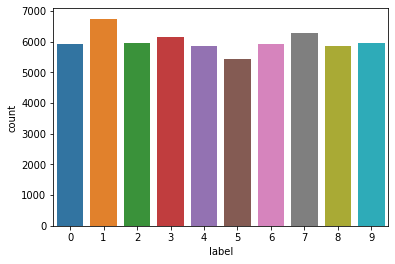

In [ ]:
# showing the count of each label in the training dataset
sns.countplot(training_data["label"])

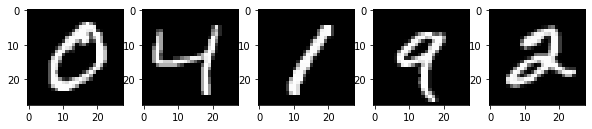

In [ ]:
# printing first five images of the training dataset
plt.figure(figsize=(10, 10))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(training_data.iloc[i+1, :-1].values.reshape((28, 28)), cmap='gray')

plt.show()

**Data Preprocessing**

In [ ]:
X = training_data.drop(columns = ['label'], axis=1)
Y = training_data['label']

In [ ]:
# Normalizing and Scaling the data
from sklearn.preprocessing import scale

X = X/255.0
x_scaled = scale(X)

Splitting the scaled X into training and testing dataset.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.3, random_state=0)

In [ ]:
print(f"X-Train Shape: {x_train.shape}")
print(f"X-Test Shape: {x_test.shape}")

X-Train Shape: (42000, 784)
X-Test Shape: (18000, 784)


In [ ]:
# building the linear svm classifier
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

**ii) Show the predictions for first twenty values of your test dataset. Display the confusion matrix.**

In [ ]:
# showing the predictions of first 20 values
y_predicted = []

for i in range(20):
  pred_i = svm_classifier.predict(x_test[i].reshape(1, -1))
  y_predicted.append(pred_i[0])

pred_comp = {'Testing Data Label': y_test[:20], 'Model Prediction': y_predicted}
prediction_table = pd.DataFrame(pred_comp)

prediction_table

,Testing Data Label,Model Prediction
3048,3,3
19563,6,6
58303,6,6
8870,6,6
40228,0,0
31488,3,3
21860,6,6
56864,2,2
845,5,5
25770,6,6


In [ ]:
y_predicted = svm_classifier.predict(x_test)

In [ ]:
# displaying the confusion matrix
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[1771,    1,    7,    0,    3,    9,   14,    2,    3,    2],
       [   0, 2028,    8,    9,    1,    2,    0,    2,   19,    1],
       [  15,   16, 1590,   34,   26,    8,   11,   16,   28,    5],
       [  13,    8,   47, 1662,    0,   63,    1,   11,   29,   13],
       [   0,    3,   21,    3, 1612,    7,    9,   15,    3,   57],
       [  25,    7,   20,   57,   19, 1400,   13,    5,   34,   11],
       [  11,    6,   24,    0,   16,   30, 1670,    1,    3,    0],
       [   6,   10,   23,   28,   26,    3,    0, 1715,    9,   49],
       [  20,   36,   41,   53,   11,   60,   13,    4, 1521,   28],
       [   7,   11,   13,   16,   64,    6,    0,   55,   19, 1593]])

**iii) Write your own function to calculate class-wise F1 score.**

In [ ]:
def precision_of_class(class_num):
  summation = 0
  for j in range(len(matrix)):
    summation += matrix[j][class_num]

  return matrix[class_num][class_num] / summation

def recall_of_class(class_num):
  summation = 0
  for j in range(len(matrix)):
    summation += matrix[class_num][j]

  return matrix[class_num][class_num] / summation

In [ ]:
class_wise_f1_score = []

for i in range(len(Y.unique())):
  prec = precision_of_class(i)
  recall = recall_of_class(i)
  f1_score = (2*prec*recall) / (prec+recall)
  class_wise_f1_score.append(f1_score)

classwise_score = {'class': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'f1-score': class_wise_f1_score}
scores = pd.DataFrame(classwise_score)
scores

,class,f1-score
0,0,0.962500
1,1,0.966635
2,2,0.897544
3,3,0.896198
4,4,0.919042
5,5,0.880780
6,6,0.956472
7,7,0.928281
8,8,0.880463
9,9,0.899238


**iv) Check the F1 scores using sklearn inbuilt function and compare the value with the F1 scores returned by your function written from scratch. Also, report the accuracy.**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1812
           1       0.95      0.98      0.97      2070
           2       0.89      0.91      0.90      1749
           3       0.89      0.90      0.90      1847
           4       0.91      0.93      0.92      1730
           5       0.88      0.88      0.88      1591
           6       0.96      0.95      0.96      1761
           7       0.94      0.92      0.93      1869
           8       0.91      0.85      0.88      1787
           9       0.91      0.89      0.90      1784

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



- The f1-score obtained by my own function, and the function from sklearn library are pretty much equal.

- Here the accuracy obtained by our model is around 92.00 %, which is pretty good with SVM Linear Kernal Classifier.

# **b) Non linear SVM**
**Build non-linear models with the RBF kernel as well as polynomial kernel. Report the accuracy.**

In [ ]:
# creating the classifier with rbf kernel using default hyperparameters
rbf_classifier = svm.SVC(kernel='rbf')
rbf_classifier.fit(x_train, y_train)

SVC()

In [ ]:
# creating the classifier with poly kernel using default hyperparameters
poly_classifier = svm.SVC(kernel='poly')
poly_classifier.fit(x_train, y_train)

SVC(kernel='poly')

In [ ]:
# making prediction from both the models
rbf_prediction = rbf_classifier.predict(x_test)
poly_prediction = poly_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracies = {'RBF Kernel': [accuracy_score(y_test, rbf_prediction)*100], 
              'Poly Kernel': [accuracy_score(y_test, poly_prediction)*100]}

In [ ]:
accuracy_table = pd.DataFrame(accuracies)
accuracy_table

,RBF Kernel,Poly Kernel
0,96.127778,95.533333


**c) Perform (grid search) cross-validation to find the optimal values of cost C and gamma for SVM classifier using RBF kernel.**


In [ ]:
# applying PCA for dimensionality reduction, because it takes lot of time in grid search
from sklearn.decomposition import PCA

processed_data = pd.DataFrame(x_train)
pca_model = PCA(n_components = 0.80)
data = pca_model.fit_transform(processed_data)

In [ ]:
data.shape

(42000, 140)

In [ ]:
reduced_dataset = pd.DataFrame(data)
reduced_dataset['label'] = y_train
reduced_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,label
0,-2.818953,-5.257245,-0.276456,4.011445,6.569181,0.027096,0.852662,0.706927,-3.683489,0.978087,...,0.071599,1.123316,-0.968498,0.329977,-1.417553,1.358999,0.472825,0.953890,0.674551,NaN
1,-4.985507,-0.271959,-4.035402,2.530742,-1.835342,0.972457,-3.802692,-2.043783,1.543830,-0.120877,...,-0.047836,-0.548760,-0.777047,0.560171,0.321243,0.123609,0.093359,-0.115647,0.677379,NaN
2,-2.404508,-2.595961,-8.379749,-3.827354,-1.831875,5.190941,-7.000974,-2.102937,-6.313696,-2.610938,...,1.214034,0.056808,0.001613,-0.383091,0.282509,-0.903816,0.159608,1.604001,0.272152,4.0
3,-7.308294,-1.284723,-3.909333,-1.250767,4.308795,6.033133,-6.205489,2.562576,2.191859,-3.998556,...,-0.469001,1.260256,0.147380,-1.032593,-0.859259,-1.659980,0.608684,0.789338,-0.229568,NaN
4,3.271329,-2.050515,8.316108,2.125373,3.187992,-3.014335,1.352964,5.367605,3.252662,3.710303,...,0.045175,-0.737054,-0.389588,0.075294,-0.837141,-0.116472,1.066709,1.220282,-0.661197,9.0


Visualizing each class labels.

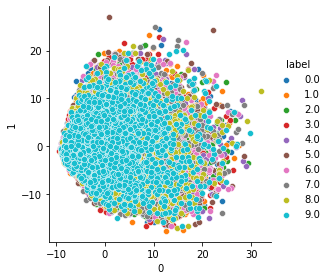

In [ ]:
sns.FacetGrid(reduced_dataset, hue = 'label', size = 4).map(sns.scatterplot, list(reduced_dataset.columns)[0], list(reduced_dataset.columns)[1]).add_legend()

Now, I'm again splitting the PCA reduced dataset to reduce the number of rows because GridSearchCV is taking much long to find the best hyperparameters with 42000 rows.

In [ ]:
px_train, px_test, py_train, py_test = train_test_split(data, y_train, test_size = 0.30, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(svm.SVC(),  {'C': [1, 10], 
                                 'gamma': [0.01, 0.1], 
                                 'kernel': ['rbf']}, cv = 2, verbose=1, n_jobs = -1)
gscv.fit(px_train, py_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.01, 0.1], 'kernel': ['rbf']},
             verbose=1)

In [ ]:
# Optimal Hyper-parameters
optimal_params = gscv.best_params_
optimal_params

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

**d) Choose the best combination of C and gamma and build the final model with chosen hyperparameters. Display the confusion matrix and report the accuracy of the model.**

In [ ]:
optimized_model = svm.SVC(kernel='rbf', C=optimal_params['C'], gamma=optimal_params['gamma'])
optimized_model.fit(px_train, py_train)

SVC(C=10, gamma=0.01)

In [ ]:
optimal_prediction = optimized_model.predict(px_test)

In [ ]:
# printing the confusion matrix of the model
optimal_matrix = confusion_matrix(py_test, optimal_prediction)
print(optimal_matrix)

[[1115    0   60    1    0    0    5    1    0    0]
 [   1 1337   15    2    0    0    2    3    7    0]
 [   4    1 1223    1    1    1    0    1    2    0]
 [   0    1  140 1126    0    6    0    4   13    3]
 [   0    2   98    0 1198    1    3    3    0   13]
 [   1    0   73   17    1 1070    9    0    3    0]
 [   2    1  132    0    1    9 1148    0    3    0]
 [   0    4  148    0    3    0    0 1162    1    7]
 [   1    3   95    6    3    9    0    3 1092    5]
 [   0    1   72    5   13    2    1   16    3 1081]]


In [ ]:
# printing the accuracy of the model
accuracy_sc = accuracy_score(py_test, optimal_prediction)*100
print(accuracy_sc)

91.68253968253968


Here, you can see that the accuracy score is very low as compared to the other models created above, regardless of taking the optimal hyper parameters from GridSearchCV still getting this much low accuracy. Why??

Because in the above models, we are training our model on the actual data points. But it is taking so much long to train, so to reduce the time, I've reduced the dimensionality of the training dataset, and then fit the gridSearchCV model. After that training the optimal model on the pca_components, which are having high variance. Maybe this is the reason why my model gives less accuracy because of the PCA Components.

**e) i) Develop a new training set by extracting the support vectors from the SVM fitted above for the chosen hyperparameters.**

In [ ]:
training_set = optimized_model.support_vectors_
training_set

array([[ 12.71900432,  -5.92453522,  -1.52903012, ...,  -0.76888998,
         -0.31164533,  -1.05114531],
       [ 15.09741554,  -2.36872653,  -1.59610739, ...,  -1.4848577 ,
          0.60096637,   1.38365718],
       [  8.51234012, -10.54455238,  -2.27601659, ...,  -0.13569849,
          0.10180763,   1.38862837],
       ...,
       [ -5.36800555,  -4.09406546,  -3.76151664, ...,   0.11993116,
         -0.05586201,  -0.58635491],
       [ -5.96088318,   3.93023473,  -4.56583604, ...,   0.42317621,
         -0.44967895,   0.58699145],
       [  7.63720624,  11.22799594,  -6.62395026, ...,  -1.41550209,
         -1.44898802,   0.72906114]])

In [ ]:
support_vec_label = optimized_model.predict(training_set)
support_vec_label

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [ ]:
new_dataset = pd.DataFrame(training_set)
new_dataset['label'] = support_vec_label
new_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,label
0,12.719004,-5.924535,-1.529030,1.004168,-0.207361,-9.626808,1.706847,0.680517,2.360030,2.469117,...,0.377501,-0.525120,-1.529953,-1.143007,0.406885,0.126632,-0.768890,-0.311645,-1.051145,0
1,15.097416,-2.368727,-1.596107,-5.224176,7.288045,-7.438792,-5.483682,-5.646047,1.352445,1.755674,...,0.625736,0.140351,-0.791506,-0.167720,0.393728,0.105850,-1.484858,0.600966,1.383657,0
2,8.512340,-10.544552,-2.276017,1.425542,-1.887179,-1.756983,4.308035,4.001390,2.077171,-1.023549,...,-0.824902,-0.942641,0.481866,1.676858,0.569669,-0.601708,-0.135698,0.101808,1.388628,0
3,6.774127,-4.556628,-1.287866,-1.145959,0.108702,-5.570231,-0.618212,4.713424,-0.439075,-0.624340,...,-0.278280,-0.078332,-0.875194,-0.388209,0.444647,-0.130466,0.055126,0.093974,1.695353,0
4,10.469382,-5.453004,-7.016087,4.506718,9.756469,-6.085106,-1.338182,-2.645584,-1.740389,0.981235,...,-0.887404,-0.792410,0.668109,1.014878,-1.218222,0.708405,-1.298953,0.546601,1.708785,0


**ii) Now fit another SVM with the new training set and report the accuracies(train, test).**

In [ ]:
new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(training_set, support_vec_label, test_size=0.3, random_state=0)

In [ ]:
# fitting another SVM
new_model = svm.SVC(kernel='rbf', C=optimal_params['C'], gamma=optimal_params['gamma'])
new_model.fit(new_xtrain, new_ytrain)

SVC(C=10, gamma=0.01)

In [ ]:
new_train_predictions = new_model.predict(new_xtrain)
new_test_predictions = new_model.predict(new_xtest)

In [ ]:
new_train_accuracy = accuracy_score(new_ytrain, new_train_predictions)
new_test_accuracy = accuracy_score(new_ytest, new_test_predictions)
print(f"Train Accuracy: {new_train_accuracy*100} %")
print(f"Test Accuracy: {new_test_accuracy*100} %")

Train Accuracy: 100.0 %
Test Accuracy: 81.18496496071353 %


Here, we can see that our model's training accuracy is 100%, which could mean that my model is **overfitting**.

**iii) Compare the accuracies with the previous models. State your observations.**

In [ ]:
# accuracy Table of each model fitted till now
accuracy_score_dict = {
    "SVM (Linear Kernel)": [accuracy_score(y_test, y_predicted)*100],
    "SVM (RBF Kernel)": [accuracy_score(y_test, rbf_prediction)*100],
    "SVM (Poly Kernel)": [accuracy_score(y_test, poly_prediction)*100],
    "Optimized SVM": [accuracy_sc],
    "SV Training Set": [new_test_accuracy*100]
}

accuracy_table = pd.DataFrame(accuracy_score_dict)
accuracy_table

,SVM (Linear Kernel),SVM (RBF Kernel),SVM (Poly Kernel),Optimized SVM,SV Training Set
0,92.011111,96.127778,95.533333,91.68254,81.184965
